## Logistic regression

In [24]:
#importing libraries
import pandas as pd #read the file
import pylab as pl
import numpy as np #read the dataset
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt

In [4]:
# load data from csv file
churn_df = pd.read_csv("ChurnData.Csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [5]:
# Data pre-processing and selection
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'callcard', 'wireless', 'churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,1.0,0.0,0


In [6]:
#how many rows and columns are in this dataset in total? what are the names of columns?
churn_df.shape

(200, 9)

In [7]:
churn_df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'callcard',
       'wireless', 'churn'],
      dtype='object')

### Let's define x, and y for our dataset:

In [22]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'callcard']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   1.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   1.]])

In [12]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

### Also , we normalize the dataset

In [39]:
#future scaling, standardization 
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58,  0.65],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -1.55],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -1.55],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  0.65],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53,  0.65]])

## Train/Test dataset

#### We split our dataset into train and test set:

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


### Modeling (Logistic Regression with Scikit-learn)

 Let's build our model using LogisticRegression from the scikit-learn package. This function implemets logistic regression and can use different numerical optimizers to find parameters, including 'newton-cg', 'ibfgs', 'sag','saga' solvers. You can find extensive information about the pros and cons of these optimizers if you search it in the internet.

The version of logistic Regression in scikit- learn, supoort regularization. Regularization is a technique used to solve the overfitting problem of machine learning models. C pram


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

Now we can predict using our test set:

In [28]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0])

predict_proba returns estimates for all classes, ordered by the label of classes, So, the first column is the probability of class 0, P(Y=0(X). and the second column is probability of class 1, P(Y=1(X):

In [29]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.59143864, 0.40856136],
       [0.5690077 , 0.4309923 ],
       [0.66604572, 0.33395428],
       [0.60813098, 0.39186902],
       [0.46925987, 0.53074013],
       [0.6486938 , 0.3513062 ],
       [0.69503399, 0.30496601],
       [0.67516168, 0.32483832],
       [0.5949431 , 0.4050569 ],
       [0.41908365, 0.58091635],
       [0.543394  , 0.456606  ],
       [0.56364352, 0.43635648],
       [0.73829421, 0.26170579],
       [0.55811001, 0.44188999],
       [0.45038796, 0.54961204],
       [0.59616585, 0.40383415],
       [0.5581598 , 0.4418402 ],
       [0.48110285, 0.51889715],
       [0.47642148, 0.52357852],
       [0.41916646, 0.58083354],
       [0.492862  , 0.507138  ],
       [0.52825338, 0.47174662],
       [0.51177208, 0.48822792],
       [0.53852849, 0.46147151],
       [0.53144235, 0.46855765],
       [0.52392088, 0.47607912],
       [0.42166044, 0.57833956],
       [0.59764318, 0.40235682],
       [0.68177489, 0.31822511],
       [0.49899862, 0.50100138],
       [0.

### Evaluation


#### Confusion matrix

Another way of looking at the accuracy of the classifier is to look at confusion matrix

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
 
    print(cm)
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[11  8]
 [ 3 18]]


Confusion matrix, without normalization
[[11  8]
 [ 3 18]]


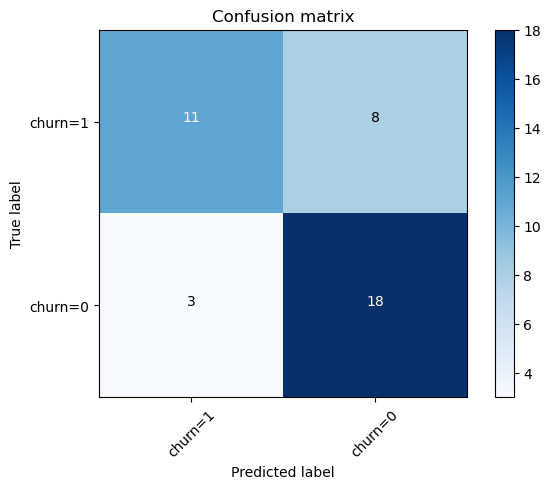

In [34]:
#Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)
#plot non normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize=False, title='Confusion matrix')

Let's 

In [35]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77        21
           1       0.79      0.58      0.67        19

    accuracy                           0.73        40
   macro avg       0.74      0.72      0.72        40
weighted avg       0.74      0.72      0.72        40



Based on the count of each section, we can calculate precision and recall of each label


Precision is a measure of thBe accuracy provided that a class has been predicted. It defined by precision = TP/(TP +FP)

#### Log loss

In logistics regression, the output can be the probability of the customer

In [40]:


from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5994551121120502

y_test

In [41]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0])

### Practice

Try to build Logistic regression model again from the same dataset, but this time, use different_solver_and regularization_values?
What is new _logloss_value?